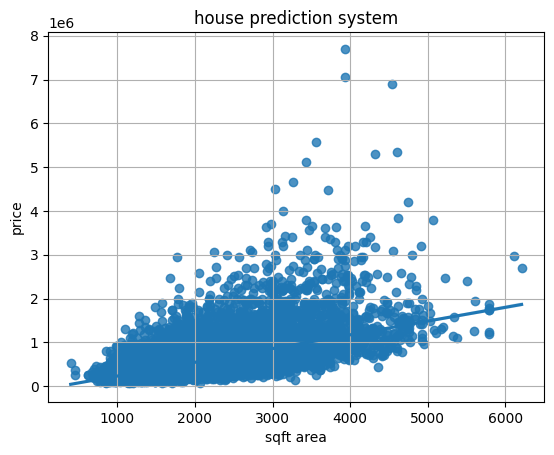

In [27]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
df=pd.read_csv("house.csv")
sns.regplot(x=df['sqft_living15'],y=df['price'])
plt.title("house prediction system")
plt.xlabel("sqft area")
plt.ylabel("price")
plt.grid(True)
plt.show()

linear regrission model will fit linear line to the above data to predict price 
supervised learnining model has data of right answer 
cretae x (feature ) and y (target) var

In [28]:
x=df[['sqft_living15']].values
y=df['price'].values

divide dataset to training and testing set

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=500,random_state=42)
print(x_test)


[[2390]
 [2370]
 [3710]
 [4050]
 [2250]
 [1710]
 [2420]
 [1920]
 [1445]
 [1720]
 [1650]
 [1730]
 [1540]
 [1760]
 [1140]
 [3690]
 [2450]
 [3540]
 [1150]
 [1540]
 [1030]
 [4060]
 [3410]
 [2410]
 [1530]
 [2000]
 [1370]
 [ 800]
 [2270]
 [1670]
 [1700]
 [2170]
 [1880]
 [1230]
 [2950]
 [2870]
 [3000]
 [1650]
 [1870]
 [1570]
 [2140]
 [1340]
 [2363]
 [2430]
 [1390]
 [1250]
 [1860]
 [1540]
 [1440]
 [2000]
 [1920]
 [1530]
 [2400]
 [1560]
 [1070]
 [3880]
 [1660]
 [2970]
 [2460]
 [2790]
 [2220]
 [1300]
 [1300]
 [2290]
 [1580]
 [1210]
 [1850]
 [2030]
 [1620]
 [3590]
 [2170]
 [2040]
 [2100]
 [2810]
 [2480]
 [3880]
 [2100]
 [1310]
 [1440]
 [3310]
 [1500]
 [2040]
 [2250]
 [1500]
 [2310]
 [1520]
 [1820]
 [1930]
 [1550]
 [1350]
 [1500]
 [2270]
 [2270]
 [3300]
 [1580]
 [1270]
 [2488]
 [1450]
 [3100]
 [2160]
 [1270]
 [2630]
 [3400]
 [1760]
 [2800]
 [1700]
 [1620]
 [2230]
 [2870]
 [4470]
 [1620]
 [1150]
 [1250]
 [2430]
 [1540]
 [1340]
 [1400]
 [1440]
 [1200]
 [1460]
 [1770]
 [1300]
 [1580]
 [1480]
 [2280]


use linear regrsiion model to predict y=b0 +b1(x) b0 is intercept and b1 is slope

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
inp=[("scale",StandardScaler()),("poly",PolynomialFeatures(degree=16)),("pred",LinearRegression())]
Pipe=Pipeline(inp)
Pipe.fit(x_train,y_train)


Pipeline(steps=[('scale', StandardScaler()),
                ('poly', PolynomialFeatures(degree=16)),
                ('pred', LinearRegression())])

use test set to predict value

In [31]:
y_hat=Pipe.predict(x_test)
print("predicted value=",y_hat[:20])
s=Pipe.score(x_test,y_test)
print(s)

predicted value= [ 594315.50041425  588321.7762005  1239176.58675431 1444106.83301327
  556755.71146464  449784.45075835  603731.12702476  491374.91005893
  397165.65301795  451822.34172117  437559.11539805  453858.22990949
  415538.45560403  459946.26739784  332094.22195121 1225628.3995092
  613663.25445203 1127827.87452443  334667.66523901  415538.45560403]
0.3935381755241003


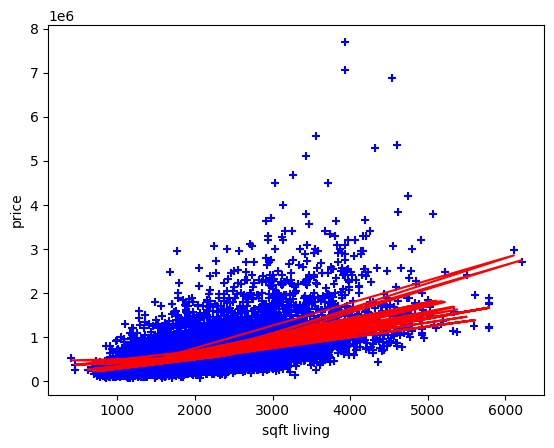

In [32]:
plt.scatter(x_train,y_train, marker='+', color='blue')
plt.plot(x_train,Pipe.predict(x_train),color='red')
plt.xlabel("sqft living")
plt.ylabel("price")
plt.show()

comparsion bet actual and predcited value

In [33]:
comaper_df=pd.DataFrame({
    "actual price":y_test,
    "predcited price":y_hat
})
comaper_df.index.name="original index"
print(comaper_df.to_string())

                actual price  predcited price
original index                               
0                   365000.0     5.943155e+05
1                   865000.0     5.883218e+05
2                  1040000.0     1.239177e+06
3                  1490000.0     1.444107e+06
4                   711000.0     5.567557e+05
5                   211000.0     4.497845e+05
6                   790000.0     6.037311e+05
7                   680000.0     4.913749e+05
8                   384500.0     3.971657e+05
9                   605000.0     4.518223e+05
10                  638000.0     4.375591e+05
11                  385000.0     4.538582e+05
12                  175000.0     4.155385e+05
13                  365000.0     4.599463e+05
14                  160000.0     3.320942e+05
15                 1070000.0     1.225628e+06
16                  800000.0     6.136633e+05
17                  795127.0     1.127828e+06
18                  355000.0     3.346677e+05
19                  474000.0     4

can also th result to csv file using to_csv

In [34]:
comaper_df.to_csv("compare.csv")

plot them using scater plot

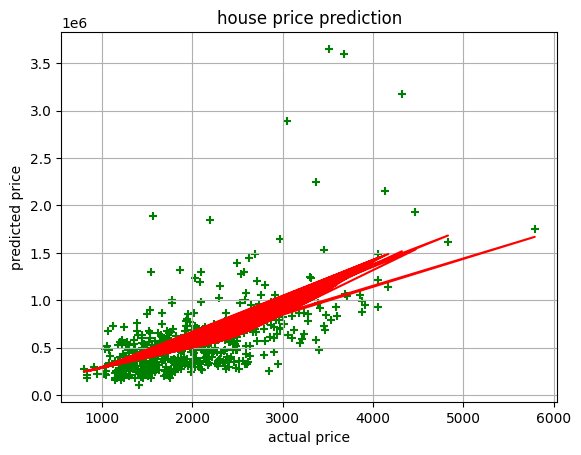

In [35]:
plt.scatter(x_test,y_test,color='green',marker='+')
plt.plot(x_test,y_hat,color='red')
plt.title("house price prediction")
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.grid(True)
plt.show()

In [36]:
from sklearn import metrics
mse=metrics.mean_squared_error(y_test,y_hat)
print("mean suare eror=",mse)

mean suare eror= 95661735120.90752


use gradient decenet to find paremeter which is best fit to data 

In [40]:
def gradeint_decent(x,y):
    w_curr=b_curr=0
    iteration=1000
    alpha=0.0001
    for i in range(iteration):
        y_pred=w_curr*x*b_curr
        n=len(x)
        cost=(1/n)*sum(val **2 for val in (y-y_pred))
        dw=-(2/n)*sum(-x*(y-y_pred))
        db=-(2/n)*sum(-(y-y_pred))
        w_curr=w_curr - alpha*dw
        b_curr=b_curr-alpha*db
        print("w= {} , b= {} , cost= {} , iteration= {}".format(w_curr,b_curr,cost,i))


x_train_id=x_train.flatten()
gradeint_decent(x_train_id,y_train)

w= -243751.85578317623 , b= -107.94332386681191 , cost= 425693742613.4003 , iteration= 0
w= 23224907043.929665 , b= 10451143.241427556 , cost= 3.055397413984669e+21 , iteration= 1
w= 2.142580594518358e+20 , b= 9.641549558274565e+16 , cost= 2.6003089814055285e+41 , iteration= 2
w= 1.8234900067719892e+40 , b= 8.205651313323484e+36 , cost= 1.8834643181713036e+81 , iteration= 3
w= 1.3207962538728982e+80 , b= 5.943544233845765e+76 , cost= 9.881486434236348e+160 , iteration= 4
w= 6.929481030841648e+159 , b= 3.1182460507162744e+156 , cost= inf , iteration= 5
w= inf , b= inf , cost= inf , iteration= 6
w= inf , b= inf , cost= inf , iteration= 7


C:\Users\Admin\AppData\Local\Temp\ipykernel_2380\2054631883.py:8: RuntimeWarning: overflow encountered in scalar power
  cost=(1/n)*sum(val **2 for val in (y-y_pred))
C:\Users\Admin\AppData\Local\Temp\ipykernel_2380\2054631883.py:6: RuntimeWarning: overflow encountered in multiply
  y_pred=w_curr*x*b_curr


w= inf , b= inf , cost= inf , iteration= 8
w= inf , b= inf , cost= inf , iteration= 9
w= inf , b= inf , cost= inf , iteration= 10
w= inf , b= inf , cost= inf , iteration= 11
w= inf , b= inf , cost= inf , iteration= 12
w= inf , b= inf , cost= inf , iteration= 13
w= inf , b= inf , cost= inf , iteration= 14
w= inf , b= inf , cost= inf , iteration= 15
w= inf , b= inf , cost= inf , iteration= 16
w= inf , b= inf , cost= inf , iteration= 17
w= inf , b= inf , cost= inf , iteration= 18
w= inf , b= inf , cost= inf , iteration= 19
w= inf , b= inf , cost= inf , iteration= 20
w= inf , b= inf , cost= inf , iteration= 21
w= inf , b= inf , cost= inf , iteration= 22
w= inf , b= inf , cost= inf , iteration= 23
w= inf , b= inf , cost= inf , iteration= 24
w= inf , b= inf , cost= inf , iteration= 25
w= inf , b= inf , cost= inf , iteration= 26
w= inf , b= inf , cost= inf , iteration= 27
w= inf , b= inf , cost= inf , iteration= 28
w= inf , b= inf , cost= inf , iteration= 29
w= inf , b= inf , cost= inf , iter

In [38]:
import numpy as np
w=np.array([1,0.2,-2.3])
b=3
x=np.array([10,20,30])
#without victorization
f=w[0]*x[0]+w[1]*x[1]+w[2]*x[2]+b
print(f)
print("using loop")
f=0
for j in range(len(w)):
    f=f+w[j]*x[j]
f=f+b
print(f)
print("using victorization")
F=np.dot(w,x)+b
print(F)

-52.0
using loop
-52.0
using victorization
-52.0
